<a href="https://colab.research.google.com/github/ADITYASHAH-IITP/Photo-Classification/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.7.0'

#CIFAR-10






---




In [ ]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D,Dropout

#Preparing Layers &  Preparing Optimizer,Loss and metrics

In [ ]:
def get_newmodel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(1e-8),kernel_initializer='he_uniform', padding='same',activation='relu',name='conv_1', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(1e-8),kernel_initializer='he_uniform', padding='same', activation='relu',name='conv_2'))
  model.add(MaxPooling2D((4, 4),name='pool-1'))
  Dropout(0.15),
  model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-8), kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-8), kernel_initializer='he_uniform', padding='same'))  
  model.add(MaxPooling2D((2, 2)))
  Dropout(0.15),
  model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-8), kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(1e-8), kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  Dropout(0.15),
  model.add(Flatten(name='flatten'))
  Dropout(0.15),
  model.add(Dense(32, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-8),name='dense-1'))
  Dropout(0.15),
  model.add(Dense(10, activation='softmax',name='dense-2'))
  # compile model
  #opt = SGD(learning_rate=0.01, momentum=0.9)
  #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

Fn for getting model acc

In [ ]:
def get_model_accuracy(model,x_test,y_test):
  test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=2)
  print(f'accuracy:{test_acc}')

# Preparing dataset


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
from tensorflow.keras import regularizers


In [ ]:
cifar_data=tf.keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels)=cifar_data.load_data()



In [ ]:
train_images=train_images[:10000]
train_labels=train_labels[:10000]
test_images=test_images[:10000]
test_labels=test_labels[:10000]

In [ ]:
train_images.shape

(50000, 32, 32, 3)

#Img Visualization

#Rescaling Images

In [ ]:


# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

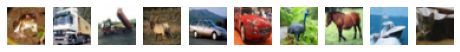

In [ ]:
fig,ax=plt.subplots(1,10,figsize=(8, 6))

for i in range(10):
	ax[i].set_axis_off()
	ax[i].imshow(train_images[i])

#Labels

In [57]:
labels=[
        'airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck',
]


#Model

In [ ]:
model=get_newmodel()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 pool-1 (MaxPooling2D)       (None, 8, 8, 32)          0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 64)          18496     
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#accuracy
get_model_accuracy(model,train_images,train_labels)

1563/1563 - 15s - loss: 2.8093 - accuracy: 0.1071 - 15s/epoch - 10ms/step
accuracy:0.10713999718427658


#Checkpoint

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint  

In [ ]:
checkpoint_path='/content/model_checkpoints/checkpoint'
checkpoint=ModelCheckpoint(filepath=checkpoint_path,frequency='epoch',save_weights_only=True,verbose=2)

#Training

In [ ]:
history=model.fit(train_images,train_labels,epochs=50,batch_size=32,callbacks=[checkpoint],validation_data=(test_images, test_labels),verbose=2)


Epoch 1/50

Epoch 00001: saving model to /content/model_checkpoints/checkpoint
1563/1563 - 20s - loss: 0.0153 - accuracy: 0.9948 - val_loss: 2.6317 - val_accuracy: 0.7332 - 20s/epoch - 13ms/step
Epoch 2/50

Epoch 00002: saving model to /content/model_checkpoints/checkpoint
1563/1563 - 18s - loss: 0.0212 - accuracy: 0.9933 - val_loss: 2.9196 - val_accuracy: 0.7144 - 18s/epoch - 11ms/step
Epoch 3/50

Epoch 00003: saving model to /content/model_checkpoints/checkpoint
1563/1563 - 17s - loss: 0.0156 - accuracy: 0.9950 - val_loss: 2.5869 - val_accuracy: 0.7381 - 17s/epoch - 11ms/step
Epoch 4/50

Epoch 00004: saving model to /content/model_checkpoints/checkpoint
1563/1563 - 17s - loss: 0.0078 - accuracy: 0.9974 - val_loss: 2.6244 - val_accuracy: 0.7415 - 17s/epoch - 11ms/step
Epoch 5/50

Epoch 00005: saving model to /content/model_checkpoints/checkpoint
1563/1563 - 18s - loss: 0.0093 - accuracy: 0.9969 - val_loss: 2.7607 - val_accuracy: 0.7358 - 18s/epoch - 11ms/step
Epoch 6/50

Epoch 00006: 

#Load Model


In [ ]:
model=get_newmodel()
model.summary()
#accuracy
get_model_accuracy(model,train_images,train_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 pool-1 (MaxPooling2D)       (None, 8, 8, 32)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1563/1563 - 8s - loss: 2.7594 - accuracy: 0.1194 - 8s/epoch - 5ms/step
accuracy:0.11940000206232071


In [ ]:
model.load_weights(checkpoint_path)
get_model_accuracy(model,train_images,train_labels)

1563/1563 - 8s - loss: 0.0199 - accuracy: 0.9932 - 8s/epoch - 5ms/step
accuracy:0.9932000041007996


In [ ]:
import pandas as pd  
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.015325,0.99476,2.631736,0.7332
1,0.021159,0.99328,2.919569,0.7144
2,0.015603,0.99498,2.586915,0.7381
3,0.007751,0.99740,2.624377,0.7415
4,0.009296,0.99686,2.760689,0.7358


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

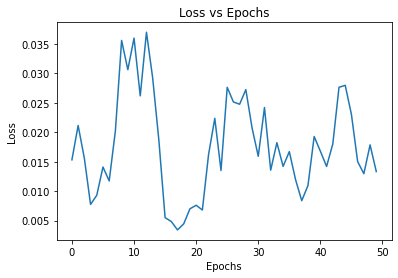

In [ ]:
loss_plot=df.plot(y="loss",title="Loss vs Epochs",legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

#Prediction

In [ ]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)  

313/313 [==============================] - 2s 7ms/step - loss: 3.0532 - accuracy: 0.7321


In [ ]:
test_images.shape[0]

10000

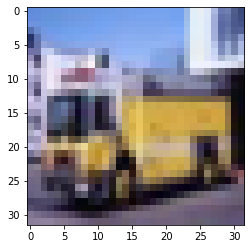

Actual label: [9]
Actual label: truck


In [58]:
random_inx=np.random.choice(test_images.shape[0])
test_image=test_images[random_inx]

plt.imshow(test_image)
figsize=(8, 6)
plt.show()
print(f"Actual label: {test_labels[random_inx]}")
a=(test_labels[random_inx])
print(f"Actual label: {labels[a[0]]}")


In [59]:
prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
print(prediction)
print(f"Model Prediction: {labels[np.argmax(prediction)]}")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Model Prediction: truck


**So the prediction and the actual labels matches**